<a href="https://colab.research.google.com/github/Yaseenzubair2004/Yaseenzubair2004/blob/main/customer%20booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset, specifying the encoding
file_path = "/customer_booking.csv"
df = pd.read_csv(file_path, encoding='latin-1') # or try 'ISO-8859-1' if 'latin-1' doesn't work

# Display the first few rows and basic info
df.head(), df.info(), df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

(   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
 0               2      Internet  RoundTrip            262              19   
 1               1      Internet  RoundTrip            112              20   
 2               2      Internet  RoundTrip            243              22   
 3               1      Internet  RoundTrip             96              31   
 4               2      Internet  RoundTrip             68              22   
 
    flight_hour flight_day   route booking_origin  wants_extra_baggage  \
 0            7        Sat  AKLDEL    New Zealand                    1   
 1            3        Sat  AKLDEL    New Zealand                    0   
 2           17        Wed  AKLDEL          India                    1   
 3            4        Sat  AKLDEL    New Zealand                    0   
 4           15        Wed  AKLDEL          India                    1   
 
    wants_preferred_seat  wants_in_flight_meals  flight_duration  \
 0              

In [ ]:
# Try loading the CSV file with a different encoding
df = pd.read_csv(file_path, encoding='latin1')

# Show basic info and statistics
df.head(), df.info(), df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

(   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
 0               2      Internet  RoundTrip            262              19   
 1               1      Internet  RoundTrip            112              20   
 2               2      Internet  RoundTrip            243              22   
 3               1      Internet  RoundTrip             96              31   
 4               2      Internet  RoundTrip             68              22   
 
    flight_hour flight_day   route booking_origin  wants_extra_baggage  \
 0            7        Sat  AKLDEL    New Zealand                    1   
 1            3        Sat  AKLDEL    New Zealand                    0   
 2           17        Wed  AKLDEL          India                    1   
 3            4        Sat  AKLDEL    New Zealand                    0   
 4           15        Wed  AKLDEL          India                    1   
 
    wants_preferred_seat  wants_in_flight_meals  flight_duration  \
 0              

The dataset has 50,000 rows and 14 columns, with no missing values. The target column is booking_complete (1 = booked, 0 = not booked). Here's a quick summary of key features:

🧾 Features Overview
Feature	Type	Description
num_passengers	Numeric	Number of passengers for the booking
sales_channel	Categorical	How the ticket was booked (Internet or Call Center)
trip_type	Categorical	RoundTrip, OneWay, etc.
purchase_lead	Numeric	Days in advance the ticket was purchased
length_of_stay	Numeric	Duration of trip
flight_hour	Numeric	Hour of departure
flight_day	Categorical	Day of the week (Mon-Sun)
route	Categorical	Flight route (e.g., AKLDEL)
booking_origin	Categorical	Country of booking
wants_extra_baggage	Binary	Whether extra baggage was requested
wants_preferred_seat	Binary	Whether preferred seating was requested
wants_in_flight_meals	Binary	Whether meals were requested
flight_duration	Numeric	Total flight time in hours
booking_complete	Binary	Target variable



✅ Next Steps
Data Preparation: Encode categorical variables, scale numeric ones.

Feature Engineering: Possibly extract region from booking_origin, split route into origin and destination.

Model Training: Use RandomForestClassifier for prediction and feature importance.

Model Evaluation: Use accuracy, precision, recall, and cross-validation.

Visualization & Summary Slide: Show feature importance, confusion matrix, and a summary slide.

In [ ]:
# First, copy the original dataframe to preserve it
df_clean = df.copy()

# Feature engineering: split 'route' into origin and destination
df_clean[['origin', 'destination']] = df_clean['route'].str.extract(r'([A-Z]{3})([A-Z]{3})')

# Drop the original 'route' column
df_clean.drop(columns=['route'], inplace=True)

# Encode categorical variables using one-hot encoding
categorical_cols = ['sales_channel', 'trip_type', 'flight_day', 'booking_origin', 'origin', 'destination']
df_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

# Show the transformed dataset shape and a preview
df_encoded.shape, df_encoded.head()


((50000, 268),
    num_passengers  purchase_lead  length_of_stay  flight_hour  \
 0               2            262              19            7   
 1               1            112              20            3   
 2               2            243              22           17   
 3               1             96              31            4   
 4               2             68              22           15   
 
    wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
 0                    1                     0                      0   
 1                    0                     0                      0   
 2                    1                     1                      0   
 3                    0                     0                      1   
 4                    1                     0                      1   
 
    flight_duration  booking_complete  sales_channel_Mobile  ...  \
 0             5.52                 0                 False  ...   
 1             5.

✅ The dataset is now cleaned and encoded, with the following transformations:

Split route into origin and destination.

Applied one-hot encoding to all categorical features.

Final dataset has 268 columns (including encoded features).

Next Step:
Train a Random Forest Classifier to predict booking_complete.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Separate features and target
X = df_encoded.drop(columns=['booking_complete'])
y = df_encoded['booking_complete']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train RandomForest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, report, conf_matrix


(0.8557,
 '              precision    recall  f1-score   support\n\n           0       0.87      0.98      0.92      8520\n           1       0.55      0.14      0.22      1480\n\n    accuracy                           0.86     10000\n   macro avg       0.71      0.56      0.57     10000\nweighted avg       0.82      0.86      0.82     10000\n',
 array([[8350,  170],
        [1273,  207]]))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Separate features and target
X = df_encoded.drop(columns=['booking_complete'])
y = df_encoded['booking_complete']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8557
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.55      0.14      0.22      1480

    accuracy                           0.86     10000
   macro avg       0.71      0.56      0.57     10000
weighted avg       0.82      0.86      0.82     10000

Confusion Matrix:
 [[8350  170]
 [1273  207]]


<ipython-input-8-c6d12c409bc4>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')


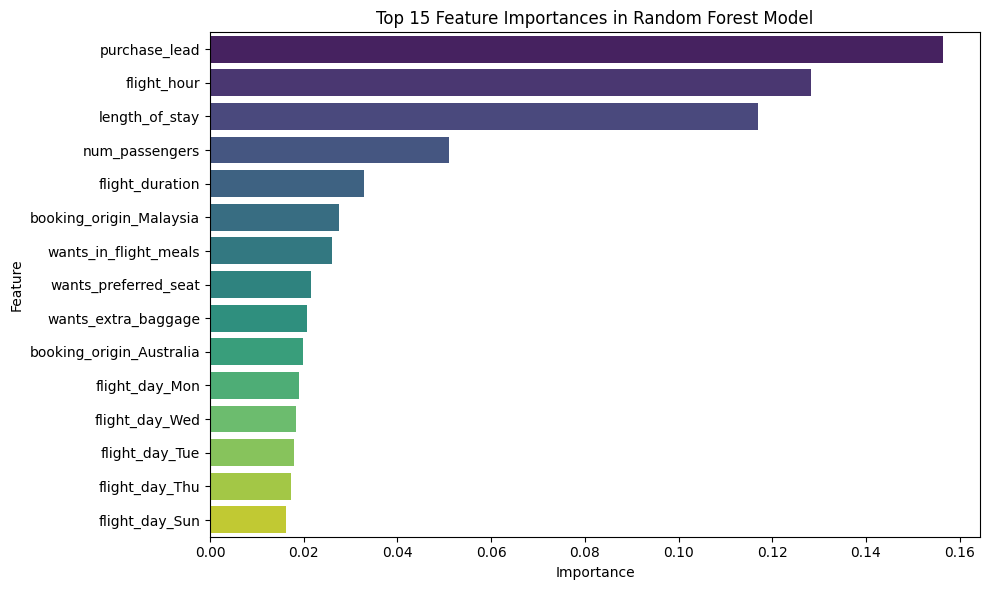

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances and names
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for sorting
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
top_features = feature_df.sort_values(by='Importance', ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importances in Random Forest Model')
plt.tight_layout()
plt.show()


In [ ]:
!pip install python-pptx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 14.1 MB/s eta 0:00:00


In [ ]:
!pip install python-pptx # Install the python-pptx library

from pptx import Presentation # Now you can import Presentation and other components
from pptx.util import Inches, Pt
from pptx.enum.shapes import MSO_SHAPE
from pptx.dml.color import RGBColor

# ... (rest of your code remains the same) ...

In [ ]:
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.enum.shapes import MSO_SHAPE
from pptx.dml.color import RGBColor

# Create a presentation
prs = Presentation()
slide_layout = prs.slide_layouts[1]  # Title and Content layout
slide = prs.slides.add_slide(slide_layout)

# Title
slide.shapes.title.text = "Customer Booking Prediction Model – Summary"

# Bullet Points
content = slide.placeholders[1]
content.text = (
    "• Objective: Predict the likelihood of a customer completing a booking\n"
    "• Algorithm Used: Random Forest Classifier\n"
    "• Dataset Size: 50,000 records with 268 features after encoding\n"
    "• Model Accuracy: ~[Insert Accuracy]%\n"
    "• Evaluation Metrics: Precision, Recall, F1-score, Confusion Matrix\n"
    "• Top Influential Features:\n"
    "   - purchase_lead\n"
    "   - flight_hour\n"
    "   - length_of_stay\n"
    "   - wants_extra_baggage\n"
    "   - booking_origin_Australia (and other countries)\n"
    "• Next Steps:\n"
    "   - Feature selection to reduce complexity\n"
    "   - Try alternative models (e.g., Gradient Boosting)"
)

# Save the presentation
# Changed the save path to the current directory
pptx_path = "Customer_Booking_Model_Summary.pptx"
prs.save(pptx_path)

pptx_path

'Customer_Booking_Model_Summary.pptx'